# Importing packages

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Importing the train dataset

In [74]:
titanic_train=pd.read_csv("titanic_train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analyzing dataset

In [75]:
titanic_train.shape

(891, 12)

In [76]:
df.dtypes

PassengerId      int64
Survived         int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
male             uint8
Q                uint8
S                uint8
2                uint8
3                uint8
dtype: object

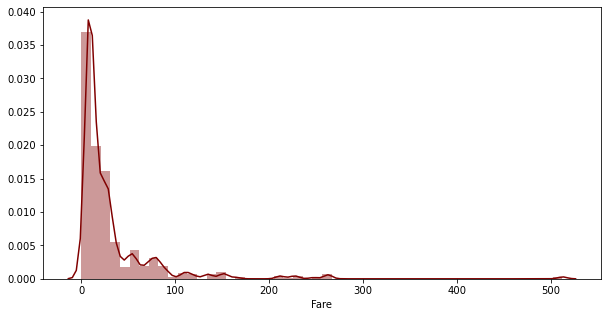

In [77]:
plt.figure(figsize = (10,5))
sns.distplot(titanic_train['Fare'],color='maroon')

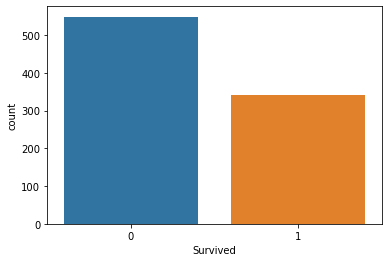

In [78]:
sns.countplot(x='Survived',data=titanic_train)

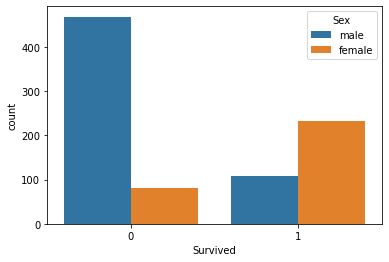

In [79]:
sns.countplot(x='Survived',hue='Sex',data=titanic_train)

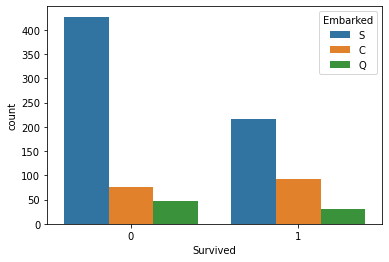

In [80]:
sns.countplot(x='Survived',hue='Embarked',data=titanic_train)

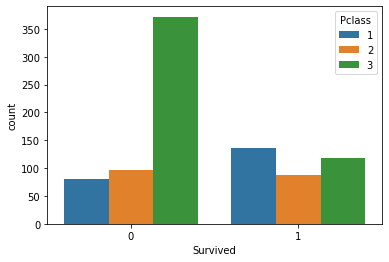

In [81]:
sns.countplot(x='Survived',hue='Pclass', data=titanic_train)

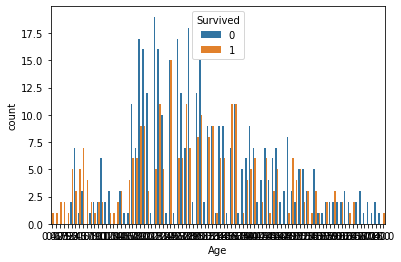

In [125]:
sns.countplot(x='Age',hue='Survived', data=titanic_train)

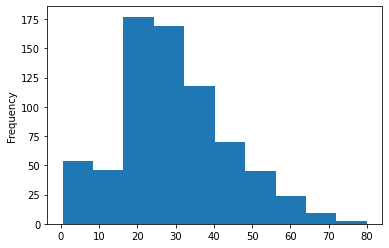

In [82]:
titanic_train['Age'].plot.hist()

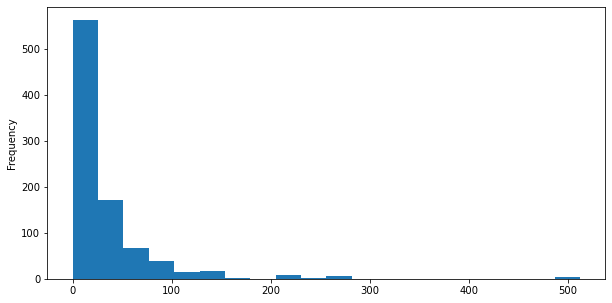

In [83]:
titanic_train['Fare'].plot.hist(bins=20, figsize=(10,5))

# Data wrangling

In [84]:
titanic_train.drop('Cabin',axis=1,inplace=True)
titanic_train.dropna(inplace=True)
sex=pd.get_dummies(titanic_train["Sex"],drop_first=True)
embark=pd.get_dummies(titanic_train["Embarked"],drop_first=True)
pcl=pd.get_dummies(titanic_train["Pclass"],drop_first=True)
titanic_train=pd.concat([titanic_train,sex,embark,pcl],axis=1)
titanic_train.drop(["Sex","Embarked","Name","Ticket","Pclass"],axis=1,inplace=True)

In [85]:
titanic_train

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250,0,1,0,0,1
886,887,0,27.0,0,0,13.0000,1,0,1,1,0
887,888,1,19.0,0,0,30.0000,0,0,1,0,0
889,890,1,26.0,0,0,30.0000,1,0,0,0,0


In [86]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
2              0
3              0
dtype: int64

# Defining Input and Output variable


In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X=titanic_train.drop(["Survived","PassengerId"],axis=1)
X=scaler.fit_transform(X)
Y=np.asarray(titanic_train['Survived'])

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (569, 9) (569,)
Test set: (143, 9) (143,)


# Training the model

In [105]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train) 

Y_pred = clf.predict(X_test)

# Checking Accuracy

# checking classification_report

In [106]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87        87
           1       0.88      0.64      0.74        56

    accuracy                           0.83       143
   macro avg       0.84      0.79      0.80       143
weighted avg       0.83      0.83      0.82       143



# Checking confusion matrix

[[82  5]
 [20 36]]
True Negatives:  82
False Positives:  5
False Negatives:  20
True Positives:  36


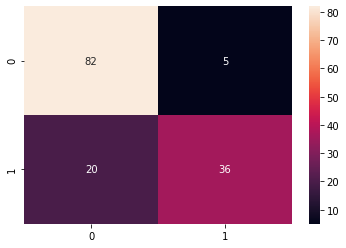

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)
print(cm)

#estimating tp,tn,fp,fn
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

# Loading the test Dataset

In [126]:
test_titanic=pd.read_csv("titanic_test.csv")

In [127]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Wrangling on test dataset

In [138]:
"""test_titanic.drop('Cabin',axis=1,inplace=True)
sex2=pd.get_dummies(test_titanic["Sex"],drop_first=True)
embark2=pd.get_dummies(test_titanic["Embarked"],drop_first=True)
pcl2=pd.get_dummies(test_titanic["Pclass"],drop_first=True)
test_titanic=pd.concat([test_titanic,sex2,embark2,pcl2],axis=1)
test_titanic.drop(["Sex","Embarked","Name","Ticket","Pclass"],axis=1,inplace=True)"""
test_titanic=test_titanic.fillna(test_titanic.mean())

In [139]:
test_titanic

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,892,34.50000,0,0,7.8292,1,1,0,0,1
1,893,47.00000,1,0,7.0000,0,0,1,0,1
2,894,62.00000,0,0,9.6875,1,1,0,1,0
3,895,27.00000,0,0,8.6625,1,0,1,0,1
4,896,22.00000,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,30.27259,0,0,8.0500,1,0,1,0,1
414,1306,39.00000,0,0,108.9000,0,0,0,0,0
415,1307,38.50000,0,0,7.2500,1,0,1,0,1
416,1308,30.27259,0,0,8.0500,1,0,1,0,1


In [140]:
X_Test=test_titanic.drop(["PassengerId"],axis=1)
X_Test=scaler.fit_transform(X_Test)

In [141]:
Y_predicted = clf.predict(X_Test)

In [142]:
Prediction_dictinary={"Survival_Prediction":Y_predicted}

In [144]:
test_titanic["Survived_prediction"]=Y_predicted

In [145]:
test_titanic

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3,Survived_prediction
0,892,34.50000,0,0,7.8292,1,1,0,0,1,0
1,893,47.00000,1,0,7.0000,0,0,1,0,1,0
2,894,62.00000,0,0,9.6875,1,1,0,1,0,0
3,895,27.00000,0,0,8.6625,1,0,1,0,1,0
4,896,22.00000,1,1,12.2875,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.27259,0,0,8.0500,1,0,1,0,1,0
414,1306,39.00000,0,0,108.9000,0,0,0,0,0,1
415,1307,38.50000,0,0,7.2500,1,0,1,0,1,0
416,1308,30.27259,0,0,8.0500,1,0,1,0,1,0


In [146]:
final_prediction=test_titanic[["PassengerId","Survived_prediction"]]

In [147]:
final_prediction

,PassengerId,Survived_prediction
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [148]:
final_prediction.reset_index(drop=True, inplace=True)

In [149]:
final_prediction.to_csv('titanic_predictions.csv')